In [99]:
import numpy as np
np.random.seed(42)

In [100]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [101]:
dataset = load_boston()

In [102]:
x = dataset.data
y = dataset.target

# Einfache Lineare Regression

## Bedeutung

<font size="4">

- $R^2$: Wie viel Streuung kann von dem Regressionsmodell erklärt werden
- coef: Steigung der Geraden
- intercept: y-Achsenabschnitt

</font>

## Symbole

<font size="4">

- $\bar{x}$: Mittelwert von $x$
- $\bar{y}$: Mittelwert von $y$
- $\hat{y}$: Prediktion vom Modell

</font>

## Datensatz

<font size="4">

- $m$: Anzahl an Samples
- $n$: Anzahl an Features
- $x$: Input-Daten (Features)
- $y$: Output Daten (Targets)

</font>

## Variablen

<font size="4">

- $x \in \mathbb{R}^{m,n}$
- $y \in \mathbb{R}^{m,}$
- coef, $\bar{x} \in \mathbb{R}^{n}$
- intercept, $\bar{y} \in \mathbb{R}$

</font>

## Formeln

<font size="4">

- coef = $\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$ 

- intercept = $\bar{y} - coef \cdot \bar{x}$

- $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y})^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$

- $\hat{y} = coef^T \cdot x + intercept$

</font>

In [103]:
class SimpleLinearRegression:
    def __init__(self) -> None:
        self.coef_: np.ndarray = None
        self.intercept_: np.ndarray = None

    def _compute_coef(self, x: np.ndarray, y: np.ndarray) -> None:
        x_mean = np.mean(x, axis=0)
        y_mean = np.mean(y, axis=0)
        numerator = np.sum((x - x_mean) * (y - y_mean))
        denominator = np.sum((x - x_mean)**2)
        self.coef_ = numerator / denominator

    def _compute_intercept(self, x: np.ndarray, y: np.ndarray) -> None:
        x_mean = np.mean(x, axis=0)
        y_mean = np.mean(y, axis=0)
        self.intercept_ = y_mean - self.coef_ * x_mean

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        self._compute_coef(x, y)
        self._compute_intercept(x, y)

    def predict(self, x: np.ndarray) -> np.ndarray:
        y_pred = self.coef_ * x + self.intercept_
        return y_pred

    def score(self, x: np.ndarray, y: np.ndarray):
        y_pred = self.predict(x)
        y_mean = np.mean(y, axis=0)
        numerator = np.sum((y - y_pred)**2)
        denominator = np.sum((y - y_mean)**2)
        r2_score = 1.0 - (numerator / denominator)
        return r2_score

In [104]:
x = dataset.data[:, 5]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [105]:
regr = SimpleLinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
r2_own = regr.score(x_test, y_test)
r2_sklearn = r2_score(y_test, y_pred)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2: {r2_own}")
print(f"R2: {r2_sklearn}")

Coef: 9.118102197303783
Intercept: -34.66230743840676
R2: 0.4584649934303069
R2: 0.4584649934303069


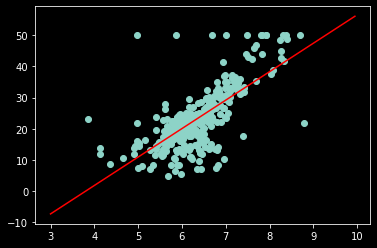

In [106]:
x_arange = np.arange(start=3.0, stop=10.0, step=0.05)
y_arange = regr.predict(x_arange)

plt.scatter(x_train, y_train)
plt.plot(x_arange, y_arange, color="red")
plt.show()